In [4]:
# Define libraries
import pandas as pd
import numpy as np
import joblib

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.pipeline import Pipeline  
from imblearn.under_sampling import RandomUnderSampler

In [5]:
# Load your data
df = pd.read_csv('data/test_100.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)

In [6]:
df

,Amount,Use Chip,Merchant State,Errors?,Is Fraud?,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,Has Chip,Cards Issued,International,Online,Age_at_transaction,income_to_debt,day_of_week,timestamp,time_of_day,distances
0,134.09,Swipe Transaction,CA,No Error,0,29278,59696,127613,787,5,1,2,0,0,36,0.467789,6,1.030861e+09,Morning,0.000000
1,38.48,Swipe Transaction,CA,No Error,0,29278,59696,127613,787,5,1,2,0,0,36,0.467789,6,1.030863e+09,Morning,33.540588
2,120.34,Swipe Transaction,CA,No Error,0,29278,59696,127613,787,5,1,2,0,0,36,0.467789,0,1.030948e+09,Morning,33.540588
3,128.95,Swipe Transaction,CA,No Error,0,29278,59696,127613,787,5,1,2,0,0,36,0.467789,0,1.030989e+09,Afternoon,33.540588
4,104.71,Swipe Transaction,CA,No Error,0,29278,59696,127613,787,5,1,2,0,0,36,0.467789,1,1.031034e+09,Morning,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203630,28.02,Chip Transaction,TX,No Error,0,30475,62135,75209,676,2,1,1,0,0,22,0.826164,2,1.582732e+09,Afternoon,0.000000
1203631,15.25,Chip Transaction,TX,No Error,0,30475,62135,75209,676,2,1,1,0,0,22,0.826164,3,1.582807e+09,Afternoon,0.000000
1203632,40.00,Chip Transaction,CO,No Error,0,30475,62135,75209,676,2,1,1,0,0,22,0.826164,3,1.582834e+09,Evening,1044.223953
1203633,146.31,Chip Transaction,CO,No Error,0,30475,62135,75209,676,2,1,1,0,0,22,0.826164,4,1.582872e+09,Morning,1044.223953


In [7]:
# Define categorical and numerical columns
categorical_features = ['Use Chip', 'Merchant State', 'Errors?', 'time_of_day']
numerical_features = [
    'Amount', 'Per Capita Income - Zipcode', 'Yearly Income - Person', 'Total Debt', 
    'FICO Score', 'Num Credit Cards', 'Has Chip', 'Cards Issued', 'International', 
    'Online', 'Age_at_transaction', 'income_to_debt', 'day_of_week', 'distances'
]

In [8]:
# Define the target variable
target = 'Is Fraud?'

In [9]:
# Preprocessing for numerical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [10]:
# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [11]:
# Define the neural network model
model = MLPClassifier(random_state=42, max_iter=500)

In [12]:
# Create the pipeline with RandomUnderSampler and preprocessing
pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('undersampler', RandomUnderSampler(random_state=42)),
        ('classifier', model)
    ])

In [13]:
# Split the data into training and testing sets
X = df.drop(columns=[target])
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
        'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'classifier__activation': ['relu', 'tanh'],
        'classifier__solver': ['adam', 'sgd'],
        'classifier__alpha': [0.0001, 0.001],
        'classifier__learning_rate': ['constant', 'adaptive']
}

In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
# Perform grid search with the pipeline
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=1, error_score='raise')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Amount',
                                                                          'Per '
                                                                          'Capita '
                                                                          'Income '
                                                                          '- '
                                                                          'Zipcode',
                                                                          'Yearly '
                                                                          'Income '
                                                                          '- '
                                                                          'Person',
                                                                          'Total '
                                                                          'Debt',
                                                                          'FICO '
                                                                          'Score',
                                                                          'Num '
                                                                          'Credit '
                                                                          'Cards',
                                                                          'Has '
                                                                          'Chip',
                                                                          'Cards '...
                                        RandomUnderSampler(random_state=42)),
                                       ('classifier',
                                        MLPClassifier(max_iter=500,
                                                      random_state=42))]),
             n_jobs=1,
             param_grid={'classifier__activation': ['relu', 'tanh'],
                         'classifier__alpha': [0.0001, 0.001],
                         'classifier__hidden_layer_sizes': [(50,), (100,),
                                                            (50, 50)],
                         'classifier__learning_rate': ['constant', 'adaptive'],
                         'classifier__solver': ['adam', 'sgd']},
             scoring='accuracy')

In [17]:
# Best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("\nBest Parameters:")
print(best_params)


Best Parameters:
{'classifier__activation': 'relu', 'classifier__alpha': 0.0001, 'classifier__hidden_layer_sizes': (50, 50), 'classifier__learning_rate': 'constant', 'classifier__solver': 'adam'}


In [18]:
# Save the model
model_filename = 'trained_model100_neuralnetwork.joblib'
joblib.dump(best_estimator, model_filename)
print(f"Model saved to {model_filename}")

Model saved to trained_model100_neuralnetwork.joblib


In [19]:
# Load the model
loaded_model = joblib.load(model_filename)
print("Model loaded successfully")

Model loaded successfully


In [20]:
# Predict using the loaded model
y_pred_loaded = loaded_model.predict(X_test)

In [21]:
# Evaluation
print('\nClassification Report (Neural Network):')
print(classification_report(y_test, y_pred_loaded))
print('Confusion Matrix (Neural Network):')
print(confusion_matrix(y_test, y_pred_loaded))
print('Accuracy Score (Neural Network):')
print(accuracy_score(y_test, y_pred_loaded))


Classification Report (Neural Network):
              precision    recall  f1-score   support

           0       1.00      0.88      0.94    240503
           1       0.01      0.88      0.01       224

    accuracy                           0.88    240727
   macro avg       0.50      0.88      0.48    240727
weighted avg       1.00      0.88      0.94    240727

Confusion Matrix (Neural Network):
[[212440  28063]
 [    28    196]]
Accuracy Score (Neural Network):
0.8833076472518662


In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predicting on the test set
y_test_pred = loaded_model.predict(X_test)

In [23]:
# Generating the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

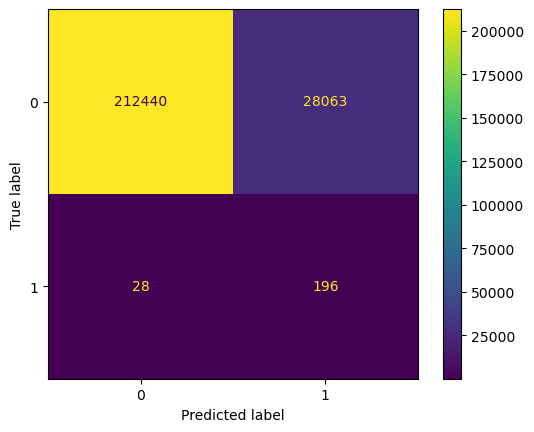

In [24]:
# Displaying the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()